In [1]:
import pandas as pd
import numpy as np
import sklearn
import os

utilities_path = "../../scripts/utilities/"
import sys
if utilities_path not in sys.path:
    sys.path.append(utilities_path)

In [2]:
from utilities import *
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline

# Define Functions

# Constant Variable Declaration

In [3]:
path = "../"

In [4]:
train_path = f"{path}Train.csv"
test_path = f"{path}Valid.csv"

In [5]:
y_fld = 'SalePrice'
splitter = Train_Test_Split("serial")._get_splitter()

In [6]:
## Create codes for doing kaggle competition and save it separately
## import from the module for my processes (Use symlinks if necessary)
## Make code for evaluating results on valid set and show result

In [7]:
data = pd.read_csv(train_path, parse_dates= ["saledate"], low_memory= False)
test_data = pd.read_csv(test_path, parse_dates= ["saledate"], low_memory= False)

In [8]:
data.sort_values("saledate", inplace= True, ignore_index = True)

In [9]:
display_all(data.tail(30).T)

,401095,401096,401097,401098,401099,401100,401101,401102,401103,401104,401105,401106,401107,401108,401109,401110,401111,401112,401113,401114,401115,401116,401117,401118,401119,401120,401121,401122,401123,401124
SalesID,6296711,6315051,6315085,6315119,6315257,6315260,6315277,6315278,6315330,6315394,6315427,6315519,6267547,6315551,6315571,6284774,6269664,6298200,6312727,6265707,6267284,6261027,6261568,6288403,6311722,6260878,6288376,6258093,6315563,6312170
SalePrice,27500,18000,15500,36000,7750,7500,9500,9500,63500,29000,11000,10000,29500,20000,9750,34500,22000,21500,11000,12500,11000,27000,10000,18000,11500,13500,9750,14500,12500,11000
MachineID,1918428,1858173,1935348,1796474,1808737,1940314,1819739,1816866,412281,1872272,1834988,1847148,1338828,1791735,1800283,1875035,1881427,1865150,1811599,1873075,872857,434680,1891153,1908296,1847105,1799594,1872596,1877553,1869637,1812622
ModelID,24719,17432,10208,17405,17438,17439,17438,17438,17481,26321,36267,36267,1133,17391,36267,14272,7624,15972,9580,43,108,3538,4089,26287,9580,4102,4875,3170,26456,9580
datasource,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149
auctioneerID,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
YearMade,1000,2004,2004,2003,2004,2004,2005,2005,2007,2006,2006,2007,1000,2008,2010,1000,1000,2005,2005,1000,1000,1000,1000,1000,2005,1000,1000,1988,2010,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00,2011-12-30 00:00:00


In [10]:
display_all(data.head(30).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
SalesID,1646770,1404019,1415646,1596358,1821514,1363540,1379228,1491298,1305337,1305336,1451684,1301884,1740272,1415950,1449641,1403992,1449549,1474844,1404057,1264985,1646995,1449555,1369391,1475263,1380746,1502329,1491351,1452578,1364654,1329620
SalePrice,9500,24000,35000,19000,14000,22500,31000,46000,17000,17000,23000,23500,10000,40000,11750,26250,13000,11250,34000,20000,10500,10500,19000,20000,81000,35000,50000,33000,14000,26500
MachineID,1126363,1169900,1262088,1433229,1194089,1413842,1082797,1322436,1517075,1236263,1434619,1182999,1090529,1142272,492948,561595,1289412,1279993,1394594,1204499,1044876,1102310,1198102,1441275,805541,1300019,846943,1544443,1270628,1253848
ModelID,8434,7110,3357,8247,10150,7267,7620,4107,3356,3356,3854,4123,8988,3357,3356,7110,3356,7257,7110,6788,8443,3356,4146,7277,4128,4155,4107,3854,7289,4089
datasource,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
auctioneerID,18,99,99,99,99,99,99,99,99,99,99,99,18,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99
YearMade,1974,1986,1975,1978,1980,1976,1986,1987,1972,1972,1969,1976,1979,1978,1966,1986,1966,1979,1987,1984,1973,1966,1971,1970,1987,1977,1987,1974,1968,1987
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [11]:
#### convert categorical variables to numerical
#### take care of missing values (replace by median or custom value, make rows showing where missing was)

In [12]:
## converting y to log scale to match evaluation metric
data.SalePrice = np.log(data.SalePrice)

In [13]:
data.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [14]:
## processing data column
get_datepart(data, "saledate")
get_datepart(test_data,"saledate")

In [15]:
train_cats(data)
## Since it is ordered, ensuring order is correct for all variables
for n,c in data.items():
    if is_categorical_dtype(c):
        if len(c.cat.categories) < 10:
            print(n, c.cat.categories)
            
## check order for 
'''
UsageBand
ProductSize
Drive_System
Enclosure_Index
Transmission Index (change autoshift and autoshift to same)
Blade_Width Index
Enclosure_Type Index
Ripper Index
Tip_Control Index
Coupler Index
Hydraulics_Flow Index
Thumb Index
Pattern_Changer Index
Grouser_Type Index
'''

UsageBand Index(['High', 'Low', 'Medium'], dtype='object')
ProductSize Index(['Compact', 'Large', 'Large / Medium', 'Medium', 'Mini', 'Small'], dtype='object')
ProductGroup Index(['BL', 'MG', 'SSL', 'TEX', 'TTT', 'WL'], dtype='object')
ProductGroupDesc Index(['Backhoe Loaders', 'Motor Graders', 'Skid Steer Loaders',
       'Track Excavators', 'Track Type Tractors', 'Wheel Loader'],
      dtype='object')
Drive_System Index(['All Wheel Drive', 'Four Wheel Drive', 'No', 'Two Wheel Drive'], dtype='object')
Enclosure Index(['EROPS', 'EROPS AC', 'EROPS w AC', 'NO ROPS', 'None or Unspecified',
       'OROPS'],
      dtype='object')
Forks Index(['None or Unspecified', 'Yes'], dtype='object')
Pad_Type Index(['Grouser', 'None or Unspecified', 'Reversible', 'Street'], dtype='object')
Ride_Control Index(['No', 'None or Unspecified', 'Yes'], dtype='object')
Stick Index(['Extended', 'Standard'], dtype='object')
Transmission Index(['AutoShift', 'Autoshift', 'Direct Drive', 'Hydrostatic',
       'None

'\nUsageBand\nProductSize\nDrive_System\nEnclosure_Index\nTransmission Index (change autoshift and autoshift to same)\nBlade_Width Index\nEnclosure_Type Index\nRipper Index\nTip_Control Index\nCoupler Index\nHydraulics_Flow Index\nThumb Index\nPattern_Changer Index\nGrouser_Type Index\n'

In [16]:
data["Transmission"] = data.Transmission.str.replace("AutoShift","Autoshift")
train_cats(data)
data.UsageBand.cat.set_categories(['High','Medium','Low'], ordered = True, inplace = True)
data.ProductSize.cat.set_categories(['Mini','Small',"Compact", "Medium","Large / Medium","Large"], ordered = True, inplace = True)
data.Drive_System.cat.set_categories(["No", "Two Wheel Drive","Four Wheel Drive","All Wheel Drive"], ordered = True, inplace = True)
data.Enclosure.cat.set_categories(['None or Unspecified','NO ROPS','OROPS', "EROPS", "EROPS AC","EROPS w AC"], ordered = True, inplace = True)
data.Blade_Width.cat.set_categories(['None or Unspecified',"<12'","12'","13'","14'","16'"], ordered = True, inplace = True)
data.Ripper.cat.set_categories(['None or Unspecified', 'High','Medium','Low'], ordered = True, inplace = True)
data.Tip_Control.cat.set_categories(['Sideshift & Tip','Tip','None or Unspecified'], ordered = True, inplace = True)
data.Hydraulics_Flow.cat.set_categories(['High Flow','Standard','None or Unspecified'], ordered = True, inplace = True)
data.Grouser_Type.cat.set_categories(['Triple','Double','Single'], ordered = True, inplace = True)

apply_cats(test_data, data)

# Looking at missing values

In [17]:
show_missing_ratio(data)

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.791955
S

In [22]:
test_y = pd.read_csv(f"{path}ValidSolution.csv")
test_data[y_fld] = test_y.SalePrice
test_data[y_fld] = np.log(test_data[y_fld])
test_data.to_feather("../output_files/tmp/bluebook_raw_test")

In [19]:
data.to_feather('../output_files/tmp/bluebook_raw')

In [20]:
data = pd.read_feather('../output_files/tmp/bluebook_raw')
y_fld = 'SalePrice'
data, y, na_dict = proc_df(data, y_fld)

In [23]:
display_all(data.head().T.sort_index())

,0,1,2,3,4
Backhoe_Mounting,1,0,0,0,0
Blade_Extension,0,0,1,0,0
Blade_Type,8,0,0,0,0
Blade_Width,0,0,3,0,0
Coupler,0,0,0,3,3
Coupler_System,0,0,0,0,0
Differential_Type,0,0,0,4,4
Drive_System,0,2,1,0,0
Enclosure,3,4,3,3,3
Enclosure_Type,0,0,3,0,0


In [24]:
class Train_Test_Split():
    def __init__(self, data_type):
        self.data_type = data_type
    def _get_splitter(self):
        if self.data_type == "serial":
            return self.serial_splitter
        if self.data_type == "random":
            return random_splitter
    def serial_splitter(self, data, train_size):
        return data[:train_size], data[train_size:]

In [13]:
splitter = Train_Test_Split("serial")._get_splitter()

In [24]:
val_len = 12000
n_train = len(data) - val_len

In [27]:
x_train, x_val = splitter(data, n_train)
y_train, y_val = splitter(y, n_train)

In [28]:
x_train.describe()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Differential_Type,Steering_Controls,sale_Year,sale_Month,sale_Week,sale_Day,sale_Dayofweek,sale_Dayofyear,sale_weekofyear,sale_Elapsed
count,3.891250e+05,3.891250e+05,389125.000000,389125.000000,389125.000000,389125.000000,3.891250e+05,389125.000000,389125.000000,389125.000000,...,389125.000000,389125.000000,389125.000000,389125.000000,389125.000000,389125.000000,389125.000000,389125.000000,389125.000000,3.891250e+05
mean,1.829352e+06,1.205540e+06,6825.716107,134.155305,6.373430,1898.721760,1.190609e+03,0.360267,1669.059695,557.196240,...,0.685004,0.345927,2003.882811,6.283379,25.649588,16.115688,2.613135,176.219757,25.649588,1.084389e+18
std,6.886840e+05,4.269106e+05,6150.811101,8.110482,16.567954,292.105011,1.677054e+04,0.854835,1257.911360,467.006623,...,1.503640,0.756679,5.711079,3.393613,14.663681,8.444423,1.406649,102.636476,14.663681,1.799262e+17
min,1.139246e+06,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,0.000000,1.000000,1.000000,...,0.000000,0.000000,1989.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,6.009984e+17
25%,1.416619e+06,1.089252e+06,3257.000000,132.000000,1.000000,1984.000000,0.000000e+00,0.000000,631.000000,206.000000,...,0.000000,0.000000,2000.000000,3.000000,12.000000,9.000000,2.000000,83.000000,12.000000,9.666432e+17
50%,1.634496e+06,1.274977e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00,0.000000,1395.000000,406.000000,...,0.000000,0.000000,2005.000000,6.000000,24.000000,16.000000,3.000000,165.000000,24.000000,1.134605e+18
75%,2.220152e+06,1.458609e+06,8637.000000,136.000000,4.000000,2000.000000,0.000000e+00,0.000000,2288.000000,704.000000,...,0.000000,0.000000,2009.000000,9.000000,39.000000,23.000000,3.000000,268.000000,39.000000,1.234138e+18
max,6.333281e+06,2.386738e+06,37198.000000,172.000000,99.000000,2012.000000,2.483300e+06,3.000000,4999.000000,1950.000000,...,4.000000,5.000000,2011.000000,12.000000,53.000000,31.000000,6.000000,365.000000,53.000000,1.313712e+18


In [29]:
x_val.describe()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Differential_Type,Steering_Controls,sale_Year,sale_Month,sale_Week,sale_Day,sale_Dayofweek,sale_Dayofyear,sale_weekofyear,sale_Elapsed
count,1.200000e+04,1.200000e+04,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04
mean,4.849833e+06,1.618784e+06,8964.610667,151.22000,4.832500,1913.267250,2531.604417,0.889583,1824.488583,623.020917,...,0.624333,0.314500,2011.0,10.416833,43.375167,15.939000,2.206667,301.832833,43.375167,1.319832e+18
std,1.841643e+06,6.520318e+05,7921.490876,16.41335,16.736097,281.289976,5100.553939,1.162040,1419.803309,534.804416,...,1.446622,0.725236,0.0,1.413948,5.716436,7.851024,1.317295,39.908626,5.716436,3.448105e+15
min,1.140212e+06,8.300000e+02,28.000000,121.00000,0.000000,1000.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,2011.0,8.000000,33.000000,1.000000,0.000000,231.000000,33.000000,1.313712e+18
25%,4.277998e+06,1.053993e+06,3357.000000,149.00000,1.000000,1995.000000,0.000000,0.000000,598.000000,196.000000,...,0.000000,0.000000,2011.0,9.000000,38.000000,10.000000,1.000000,266.000000,38.000000,1.316736e+18
50%,6.258986e+06,1.847404e+06,4735.000000,149.00000,1.000000,2001.000000,0.000000,0.000000,1427.000000,412.000000,...,0.000000,0.000000,2011.0,10.000000,43.000000,15.500000,2.000000,300.000000,43.000000,1.319674e+18
75%,6.285309e+06,2.270156e+06,14310.000000,172.00000,2.000000,2005.000000,3414.250000,2.000000,2512.000000,783.000000,...,0.000000,0.000000,2011.0,12.000000,49.000000,22.000000,3.000000,342.000000,49.000000,1.323302e+18
max,6.333342e+06,2.486330e+06,36877.000000,172.00000,99.000000,2013.000000,155250.000000,3.000000,4998.000000,1949.000000,...,4.000000,3.000000,2011.0,12.000000,52.000000,31.000000,6.000000,364.000000,52.000000,1.325203e+18


In [30]:
## validation data is coming from the last few months of 2011 as expected
## this will create a good imitation of the test set

In [21]:
def rmse(x,y):
    return np.sqrt(((x -y)**2).mean())

def print_score(m):
    train_score = rmse(m.predict(x_train),y_train)
    val_score = rmse(m.predict(x_val),y_val)
    res = [train_score, val_score]
    res.extend([m.score(x_train, y_train), m.score(x_val, y_val)])
    if hasattr(m, "oob_score_"):
        res.append(m.oob_score_)
    print(res)

# Base Model Score

In [32]:
m = RandomForestRegressor(n_jobs= -1)
%time m.fit(x_train, y_train)
print_score(m)

CPU times: user 21min 23s, sys: 3.71 s, total: 21min 27s
Wall time: 2min 55s
[0.07609659495557755, 0.24540110754106575, 0.9879267048333141, 0.8847875946662275]


In [33]:
## This is taking too much time to run
## But our base score is pretty good even though there is good amount of over fitting
## We will test this score on the validation set provided by kaggle
## For this completed competition we have the expected output as well

In [47]:
test_data.shape
#Already the conversion to category has been done for test data. We need to add the y data, and do missing value
## treatment using the na_dict

(11573, 52)

In [35]:
test_y = pd.read_csv(f"{path}ValidSolution.csv")
test_data[y_fld] = test_y.SalePrice
test_data[y_fld] = np.log(test_data[y_fld])
x_test, y_test, na_dict = proc_df(test_data,y_fld, na_dict)

In [38]:
m.score(x_test, y_test)

0.8733539344653868

In [39]:
import math
print(rmse(m.predict(x_test), y_test))
print_score(m)
m.score(x_test, y_test)

0.26136271018284896
[0.07609659495557757, 0.24540110754106575, 0.9879267048333141, 0.8847875946662275]


0.8733539344653868

In [40]:
### We have a good starting score but there is still overfitting happening
## We can reduce the overfitting
## Currently Each iteration takes 3 minutes, so fixing that for enabling faster iterations
## change the structure of the proc df code

In [41]:
def get_sample(df,n):
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs]
    
def proc_df(df, y_fld, na_dict = None, max_n_cat = 0, subset = None):
    '''
    splits dataframe into target variable and df
    converts the df into completely numerical data
    treats missing values by replacing with median and creating a column marking the missing value
    converts all categorical variables with less than max_n_cat categories into one hot encoded 
    the other categories are kept as label encoded
    
    if na_dict is given uses the dict to update the missing values
    '''
    if subset:
        df = get_sample(df, subset)
    ### separate y column
    if not is_numeric_dtype(df[y_fld]): df[y_fld].astype("category").cat.codes
    y = df[y_fld].values
    df.drop(y_fld, axis = 1, inplace = True)

    ##fix missing values
    if not na_dict:
        na_dict = {}
    for n,c in df.items():
        na_dict = fix_missing(df,n,c,na_dict)

    ## encoding categorical variables
    for n,c in df.items():
        numericalize(df, n, c, max_n_cat)
    df = pd.get_dummies(df)
    return [df, y,na_dict]


In [42]:
data = pd.read_feather('../output_files/tmp/bluebook_raw')
data_sm, y, na_dict = proc_df(data, y_fld, na_dict, subset = 30000)
x_train, _ = splitter(data_sm, 20000)
y_train, _ = splitter(y, 20000)

/home/kiran/miniconda3/envs/ds/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
../../scripts/utilities/utilities.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[n+"_na"] = c.isnull()
../../scripts/utilities/utilities.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [43]:
m = RandomForestRegressor(n_jobs= -1)
%time m.fit(x_train, y_train)
print_score(m)

CPU times: user 30.8 s, sys: 64.6 ms, total: 30.9 s
Wall time: 4.28 s
[0.09326229928942208, 0.33634862333991244, 0.981437576906887, 0.7835659851371192]


In [44]:
m.score(x_test, y_test), rmse(m.predict(x_test), y_test)

(0.7796345371610409, 0.3447621169203211)

In [45]:
#### The time for running a model has reduced to 4.2 sec

In [46]:
m = RandomForestRegressor(n_estimators= 1, bootstrap= False, max_depth= 3, n_jobs= -1)
m.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
def draw_tree(t, df):
    plt.figure(figsize = (20,10))
    sklearn.tree.plot_tree(t, feature_names= df.columns, filled = True, rotate = True)

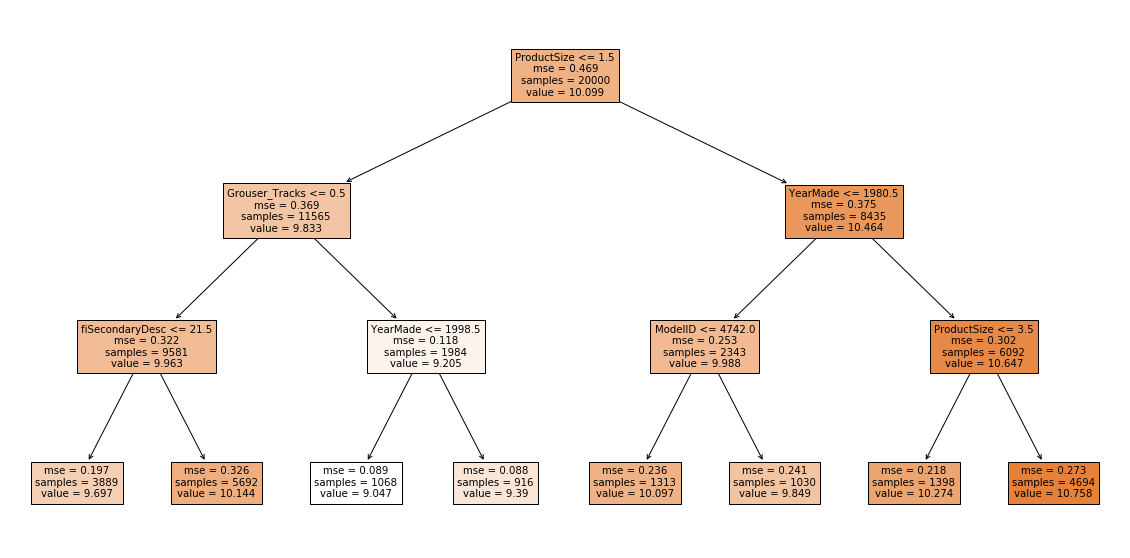

In [48]:
draw_tree(m.estimators_[0], x_train)

In [49]:
m = RandomForestRegressor(n_estimators= 40, bootstrap= True, n_jobs= -1, oob_score= True, max_samples= 20000)
%time m.fit(x_train, y_train)
print_score(m)

CPU times: user 12.6 s, sys: 8.36 ms, total: 12.6 s
Wall time: 1.98 s
[0.0970514478423013, 0.3409822022079722, 0.9798985924880114, 0.7775616682154849, 0.8569201234354215]


In [50]:
data = pd.read_feather('../output_files/tmp/bluebook_raw')
data, y, na_dict = proc_df(data, y_fld, na_dict)
x_train, x_val = splitter(data, n_train)
y_train, y_val = splitter(y, n_train)

In [51]:
m = RandomForestRegressor(n_estimators= 40, bootstrap= True, n_jobs= -1, oob_score= True, max_samples= 20000)
%time m.fit(x_train, y_train)
print_score(m)

CPU times: user 39.7 s, sys: 100 ms, total: 39.8 s
Wall time: 9.6 s
[0.22908269387188931, 0.27502635705066136, 0.8905842269416201, 0.8552912342633272, 0.8788837235548503]


In [52]:
m = RandomForestRegressor(n_estimators= 40, bootstrap= True, n_jobs= -1, oob_score= True, max_samples= 20000, max_features="sqrt")
%time m.fit(x_train, y_train)
print_score(m)

CPU times: user 11.9 s, sys: 40.1 ms, total: 11.9 s
Wall time: 5.82 s
[0.2508769936312679, 0.2973315841095535, 0.86877486038279, 0.8308670218601242, 0.8547072513424452]


In [53]:
m = RandomForestRegressor(n_estimators= 40, bootstrap= True, n_jobs= -1, oob_score= True, max_samples= 20000, max_features="log2")
%time m.fit(x_train, y_train)
print_score(m)

CPU times: user 10.7 s, sys: 68 ms, total: 10.8 s
Wall time: 5.64 s
[0.25997691265869427, 0.3102425357487002, 0.8590824985969637, 0.8158596816620273, 0.8440126745645681]


In [54]:
m = RandomForestRegressor(n_estimators= 40, bootstrap= True, n_jobs= -1, oob_score= True, max_samples= 20000, max_features=.5)
%time m.fit(x_train, y_train)
print_score(m)

CPU times: user 24.5 s, sys: 56.6 ms, total: 24.6 s
Wall time: 7.72 s
[0.22938756986316056, 0.27559689421947053, 0.8902927999533142, 0.8546902201147657, 0.8785555312443318]


In [ ]:
### .5 Makes more sense

In [ ]:
## Tree variance
## Feature Importance
## Partial dependance plots
## One hot encoding
## Removing features with low variation
## Remove variables with predicting time ability

# Tree Variance

In [55]:
m = RandomForestRegressor(n_estimators= 40, bootstrap= True, n_jobs= -1, oob_score= True, max_samples= 50000, max_features=.5)
%time m.fit(x_train, y_train)
print_score(m)

CPU times: user 54.9 s, sys: 108 ms, total: 55 s
Wall time: 11.5 s
[0.19771246781598575, 0.2564937281043344, 0.9184988974388467, 0.8741365282852075, 0.8950196673907147]


In [56]:
%time prediction = np.stack([t.predict(x_val) for t in m.estimators_])
mean = np.mean(prediction, 0)
std = np.std(prediction,0)

CPU times: user 1.18 s, sys: 4 ms, total: 1.19 s
Wall time: 1.19 s


In [61]:
data = pd.read_feather('../output_files/tmp/bluebook_raw')
raw_x_train, _ = splitter(data, n_train)

%time trn_prediction = np.stack([t.predict(x_train) for t in m.estimators_])
raw_mean = np.mean(trn_prediction, 0)
raw_std = np.std(trn_prediction,0)

CPU times: user 36.3 s, sys: 1.24 s, total: 37.5 s
Wall time: 37.5 s


In [62]:
raw_x_train["std"] = raw_std
raw_x_train["mean"] = raw_mean

/home/kiran/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kiran/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
def var_summary(df, summary_fields, max_n_cat = 10):
    '''
    Create group wise average of various fields. 
    e.g. include mean, std, accuracy etc
    Use for identifying cases where model is performing badly
    '''
    categorical_feat = []
    for n,c in df.items():
        if is_categorical_dtype(c):
            if len(c.cat.categories) < max_n_cat:
                categorical_feat.append(n)
    for field in categorical_feat:
        print("############", field, "###############")
        print(df[field].value_counts())
        summary_fields.append(field)
        summ = df[summary_fields].groupby(field, as_index = False).mean()
        print(summ)
        summary_fields.pop()

In [64]:
var_summary(raw_x_train,['SalePrice', 'mean', 'std'])

############ UsageBand ###############
Medium    31561
Low       21924
High      11295
Name: UsageBand, dtype: int64
  UsageBand  SalePrice       mean       std
0      High  10.465355  10.476376  0.239971
1    Medium  10.276027  10.263112  0.236344
2       Low  10.008958   9.985702  0.272658
############ ProductSize ###############
Medium            60320
Large / Medium    47843
Small             25766
Mini              23959
Large             20550
Compact            5925
Name: ProductSize, dtype: int64
      ProductSize  SalePrice       mean       std
0            Mini   9.536436   9.546375  0.249361
1           Small  10.263521  10.257970  0.274991
2         Compact   9.681148   9.707382  0.265929
3          Medium  10.552881  10.556788  0.279650
4  Large / Medium  10.616090  10.613762  0.309217
5           Large  10.410442  10.400681  0.340273
############ ProductGroup ###############
TEX    97719
TTT    78355
BL     77358
WL     69115
SSL    41788
MG     24790
Name: ProductGroup, 

  Differential_Type  SalePrice       mean       std
0      Limited Slip  10.876986  10.875087  0.233534
1           Locking  11.074390  10.999747  0.267533
2           No Spin  10.775938  10.757432  0.243699
3          Standard  10.315864  10.317150  0.278486
############ Steering_Controls ###############
Conventional           66820
Command Control          484
Four Wheel Standard      137
Wheel                     14
No                         1
Name: Steering_Controls, dtype: int64
     Steering_Controls  SalePrice       mean       std
0      Command Control  11.199389  11.146979  0.224586
1         Conventional  10.320799  10.322293  0.277877
2  Four Wheel Standard   9.997858  10.016045  0.327979
3                   No   9.769956   9.581431  0.370523
4                Wheel   9.896653  10.026543  0.389507


### There are some groups here which we can look at in depth. But first let's look at feature importance

In [65]:
def rf_feat_imp(m, df):
    feat = df.columns
    imp = np.round(m.feature_importances_,6)
    return pd.DataFrame({"feat":feat,"imp":imp}).sort_values("imp", ascending = False)

In [66]:
fi = rf_feat_imp(m, x_train); fi[:12]

,feat,imp
5,YearMade,0.153209
13,ProductSize,0.138720
19,Enclosure,0.138518
37,Coupler_System,0.071556
64,sale_Elapsed,0.048364
10,fiSecondaryDesc,0.043775
14,fiProductClassDesc,0.040961
38,Grouser_Tracks,0.040606
2,ModelID,0.039281
39,Hydraulics_Flow,0.030358


In [24]:
def plot_fi(fi, type = "barh"): return fi.plot('feat', 'imp', type, figsize=(15,8), legend=False)

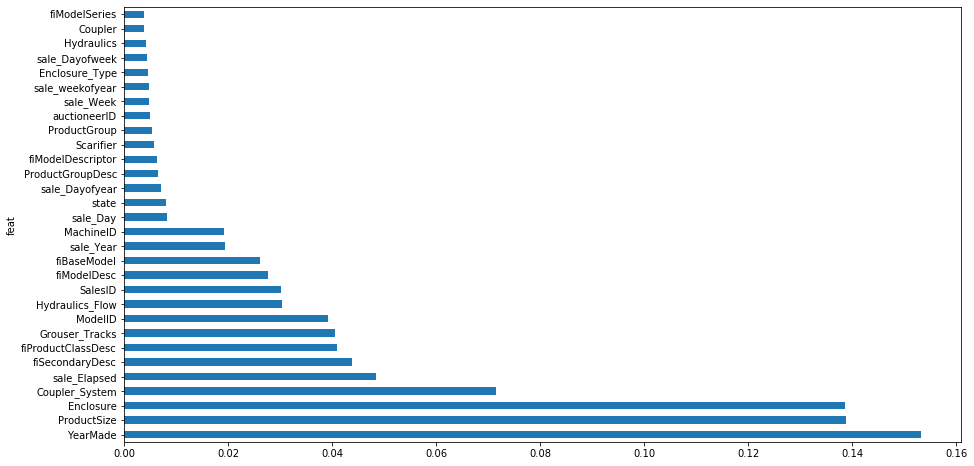

In [68]:
plot_fi(fi[:30])

In [69]:
to_keep = fi[fi.imp>= .005].feat; len(to_keep)

22

In [70]:
data, y, na_dict = proc_df(data, y_fld, na_dict)
df_keep = data[to_keep]
x_train, x_val = splitter(df_keep, n_train)

In [71]:
m = RandomForestRegressor(n_estimators= 100, bootstrap= True, n_jobs= -1, oob_score= True, max_features=.5)

m.fit(x_train, y_train)
print_score(m)

[0.07561406894551308, 0.23917598963566322, 0.9880793321283735, 0.8905586690534313, 0.9133083536768984]


In [72]:
import math
x_test = x_test[to_keep]
print(rmse(m.predict(x_test), y_test))
print_score(m)
m.score(x_test, y_test)

0.25174116778452976
[0.07561406894551308, 0.23917598963566322, 0.9880793321283735, 0.8905586690534313, 0.9133083536768984]


0.8825067444737502

In [ ]:
??print_score

In [ ]:
### One Hot encoding
## First we can try different parameters on a smaller model and see which works best

In [74]:
m = RandomForestRegressor(n_estimators= 40, bootstrap= True, n_jobs= -1, oob_score= True, max_features=.5,
                         max_samples= 40000)

m.fit(x_train, y_train)
print_score(m)

[0.20577685064819193, 0.2579972534918382, 0.9117146989049364, 0.8726566202133297, 0.8917990326009306]


In [75]:
m = RandomForestRegressor(n_estimators= 40, bootstrap= True, n_jobs= -1, oob_score= True, max_features=.5,
                         max_samples= 40000, min_samples_leaf= 3)

m.fit(x_train, y_train)
print_score(m)

[0.21652489806598993, 0.25772521267090986, 0.9022512852553551, 0.8729250287561268, 0.8880475700606104]


## So from now on we will use min sample leaf as 3

In [76]:
m = RandomForestRegressor(n_estimators= 40, bootstrap= True, n_jobs= -1, oob_score= True, max_features=.6,
                         max_samples= 40000, min_samples_leaf= 3)

m.fit(x_train, y_train)
print_score(m)

[0.21543909088435886, 0.2571154115031375, 0.9032291879051011, 0.8735256590967202, 0.8887663963113823]


## Max features will be .6

In [77]:
##Let's get the updated base score before going ahead with the next step

In [79]:
m = RandomForestRegressor(n_estimators= 100, bootstrap= True, n_jobs= -1, oob_score= True, max_features=.6,
                          min_samples_leaf= 3)

m.fit(x_train, y_train)
print_score(m)

[0.12215848854565461, 0.23733257417954143, 0.9688869439529111, 0.8922391753400257, 0.9113256731744609]


# Looking at features with high correlation

In [90]:
from scipy.cluster import hierarchy as hc
import scipy

In [91]:
def plot_corr_dendogram(df):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(16,10))
    dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
    plt.show()

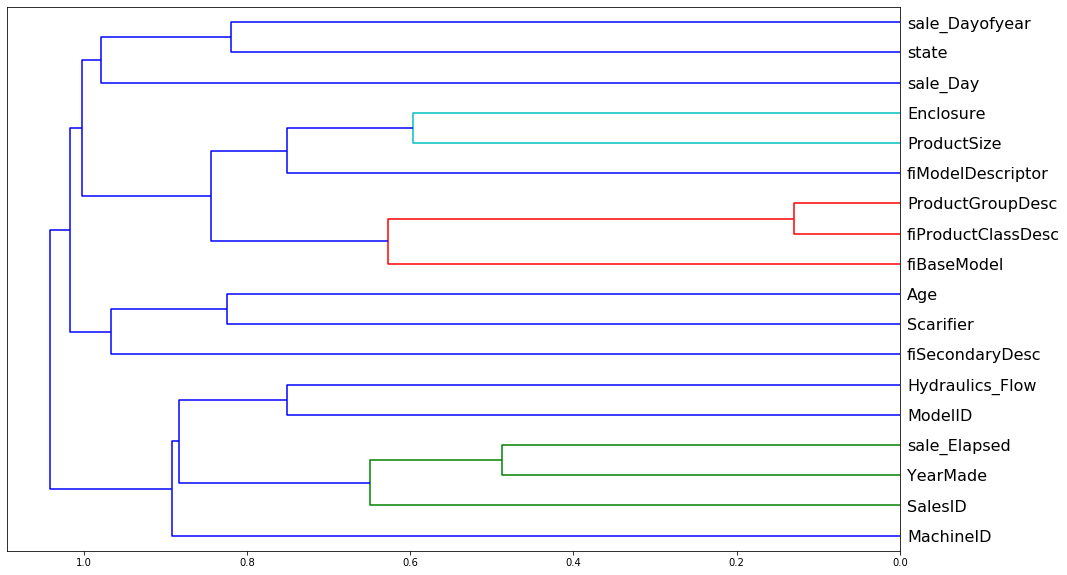

In [92]:
plot_corr_dendogram(x_train)

In [92]:
col_to_remove = ["ProductGroupDesc","ProductGroup","sale_Year","sale_Elapsed","Hydraulics_Flow","Grouser_Tracks",
                "Coupler_System","fiBaseModel","fiModelDesc"]

In [108]:
def get_score(df):
    m = RandomForestRegressor(n_estimators= 40, bootstrap= True, n_jobs= -1, oob_score= True, max_features=.6,
                          min_samples_leaf= 3, max_samples= 40000)
    x_train, _ = splitter(df_keep, n_train)
    m.fit(x_train,y_train)
    return m.oob_score_

In [109]:
## base score
base_score = get_score(df_keep)

In [112]:
print(base_score)

0.8884895098975262


In [111]:
for c in col_to_remove:
    c_score = get_score(df_keep.drop(c,axis = 1))
    print(c, c_score, c_score > base_score, 100*(c_score-base_score))

ProductGroupDesc 0.8883534774873195 False -0.013603241020665457
ProductGroup 0.888849665454107 True 0.03601555565808656
sale_Year 0.8886106203342761 True 0.012111043674989386
sale_Elapsed 0.8884632805454786 False -0.0026229352047546506
Hydraulics_Flow 0.8885523572802339 True 0.006284738270767587
Grouser_Tracks 0.8886343274634099 True 0.014481756588369255
Coupler_System 0.8886804332095157 True 0.01909233119895548
fiBaseModel 0.8882521290294525 False -0.023738086807367775
fiModelDesc 0.8880568611231268 False -0.04326487743994134


In [118]:
col_to_drop = ["ProductGroup", "sale_Year", "Coupler_System", "fiModelDesc"]

In [114]:
## we should also try seeing if we can remove one of hydraulics flow, Grouser Tacks

In [119]:
df_keep_updated = df_keep.drop(col_to_drop, axis = 1)
x_train, x_val = splitter(df_keep_updated, n_train)

m = RandomForestRegressor(n_estimators= 100, bootstrap= True, n_jobs= -1, oob_score= True, max_features=.6,
                          min_samples_leaf= 3)

m.fit(x_train, y_train)
print_score(m)

[0.12380653960827738, 0.2380457939102317, 0.968041783054173, 0.8915905275073842, 0.910184435013578]


In [120]:
x_train, x_val = splitter(df_keep_updated.drop("Grouser_Tracks", axis = 1), n_train)

m = RandomForestRegressor(n_estimators= 100, bootstrap= True, n_jobs= -1, oob_score= True, max_features=.6,
                          min_samples_leaf= 3)

m.fit(x_train, y_train)
print_score(m)

[0.12296877331344551, 0.23832102991133935, 0.9684728254273828, 0.8913396897242394, 0.9104202699134704]


In [127]:
df_keep_updated.drop("Grouser_Tracks", axis = 1, inplace= True)

In [121]:
### We have got simpler model with .001 drop in rmse. This will be the data frame from now on

In [122]:
## Let's get the score for this on the original validation set

In [124]:
x_test.drop(col_to_drop, axis = 1, inplace= True)
x_test.drop("Grouser_Tracks", axis = 1, inplace= True)

In [125]:
print(rmse(m.predict(x_test), y_test))

0.2506214011829209


In [126]:
m.score(x_test, y_test)

0.8835496602453448

In [136]:
## Score has improved. Save the list of col 
## load data from feather format, select column using this list, apply_proc_df
## Currently 50th on the leader board
np.save("../output_files/tmp/col_to_keep.npy",np.array(x_train.columns))

# Analyzing remaining features

In [15]:
col_to_keep = np.load("../output_files/tmp/col_to_keep.npy", allow_pickle= True)

data = pd.read_feather('../output_files/tmp/bluebook_raw')
data, y, na_dict = proc_df(data, y_fld, na_dict)
data = data[col_to_keep]
x_train, x_val = splitter(data, n_train)
y_train, y_val = splitter(y, n_train)

In [20]:
m = RandomForestRegressor(n_estimators= 100, bootstrap= True, n_jobs= -1, oob_score= True, max_features=.6,
                          min_samples_leaf= 3)
m.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
col_to_keep.tolist().append("SalePrice")
np.array(col_to_keep)

array(['YearMade', 'ProductSize', 'Enclosure', 'sale_Elapsed',
       'fiSecondaryDesc', 'fiProductClassDesc', 'ModelID',
       'Hydraulics_Flow', 'SalesID', 'fiBaseModel', 'MachineID',
       'sale_Day', 'state', 'sale_Dayofyear', 'ProductGroupDesc',
       'fiModelDescriptor', 'Scarifier'], dtype=object)

In [17]:
sel_cols = col_to_keep.tolist()
sel_cols.append("SalePrice")

In [18]:
raw_data = pd.read_feather('../output_files/tmp/bluebook_raw')
raw_data = raw_data[sel_cols]
raw_x_train, _ = splitter(raw_data, n_train)

%time trn_prediction = np.stack([t.predict(x_train) for t in m.estimators_])
raw_mean = np.mean(trn_prediction, 0)
raw_std = np.std(trn_prediction,0)

NameError: name 'm' is not defined

NameError: name 'trn_prediction' is not defined

In [175]:
raw_x_train["std"] = raw_std
raw_x_train["mean"] = raw_mean

/home/kiran/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kiran/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [176]:
var_summary(raw_x_train,['SalePrice', 'mean', 'std'])

############ ProductSize ###############
Medium            60320
Large / Medium    47843
Small             25766
Mini              23959
Large             20550
Compact            5925
Name: ProductSize, dtype: int64
      ProductSize  SalePrice       mean       std
0            Mini   9.536436   9.538735  0.141042
1           Small  10.263521  10.262694  0.155046
2         Compact   9.681148   9.686724  0.149556
3          Medium  10.552881  10.554359  0.161326
4  Large / Medium  10.616090  10.615181  0.180406
5           Large  10.410442  10.406934  0.208264
############ Enclosure ###############
OROPS                  170140
EROPS                  136194
EROPS w AC              82449
EROPS AC                   17
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64
             Enclosure  SalePrice       mean       std
0  None or Unspecified   9.699503   9.853342  0.219639
1              NO ROPS  10.697825  10.589956  0.280620
2                OR

In [177]:
x_train.columns

Index(['YearMade', 'ProductSize', 'Enclosure', 'sale_Elapsed',
       'fiSecondaryDesc', 'fiProductClassDesc', 'ModelID', 'Hydraulics_Flow',
       'SalesID', 'fiBaseModel', 'MachineID', 'sale_Day', 'state',
       'sale_Dayofyear', 'ProductGroupDesc', 'fiModelDescriptor', 'Scarifier'],
      dtype='object')

In [178]:
x_train

,YearMade,ProductSize,Enclosure,sale_Elapsed,fiSecondaryDesc,fiProductClassDesc,ModelID,Hydraulics_Flow,SalesID,fiBaseModel,MachineID,sale_Day,state,sale_Dayofyear,ProductGroupDesc,fiModelDescriptor,Scarifier
0,1974,4,3,600998400000000000,0,47,8434,0,1646770,1735,1126363,17,44,17,5,0,0
1,1986,0,4,602208000000000000,0,2,7110,0,1404019,243,1169900,31,9,31,1,0,0
2,1975,0,3,602208000000000000,57,31,3357,0,1415646,19,1262088,31,9,31,2,0,2
3,1978,4,3,602208000000000000,0,63,8247,0,1596358,349,1433229,31,9,31,6,0,0
4,1980,0,3,602208000000000000,0,60,10150,0,1821514,557,1194089,31,9,31,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389120,1999,0,3,1313712000000000000,0,41,9563,2,6310687,475,1406873,19,28,231,3,0,0
389121,2001,0,3,1313712000000000000,0,35,10217,0,6315162,1500,1850834,19,28,231,2,0,1
389122,1977,4,4,1313712000000000000,21,63,4749,0,6282961,349,1867277,19,28,231,6,0,0
389123,1999,0,3,1313712000000000000,45,41,17596,2,1827573,72,1436489,19,28,231,3,0,0


## partial dependence plot

In [21]:
from pdpbox import pdp
from plotnine import *

In [22]:
fi = rf_feat_imp(m, x_train); fi[:12]

,feat,imp
0,YearMade,0.164206
1,ProductSize,0.163297
2,Enclosure,0.147911
7,Hydraulics_Flow,0.122197
3,sale_Elapsed,0.072305
5,fiProductClassDesc,0.055817
4,fiSecondaryDesc,0.051645
6,ModelID,0.045673
9,fiBaseModel,0.044826
8,SalesID,0.040007


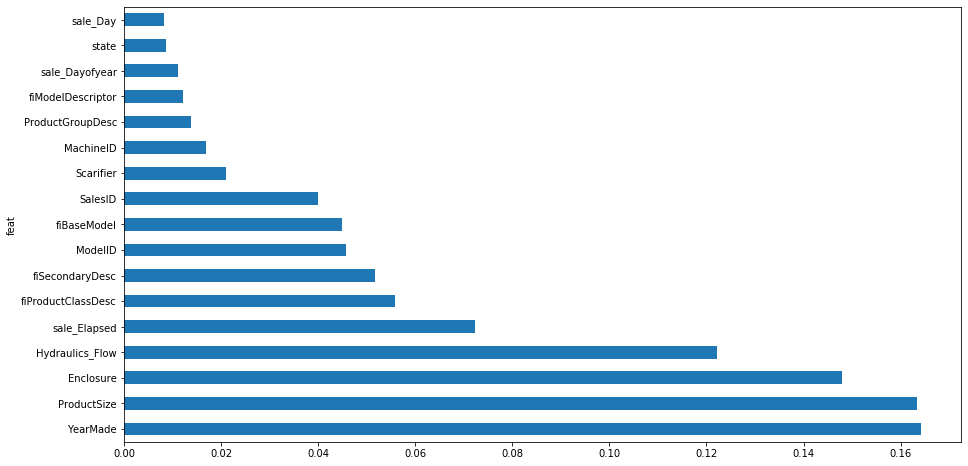

In [25]:
plot_fi(fi)

In [183]:
## year made and sale elapsed are important, maybe age can also be important

In [26]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x,x.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

In [27]:
x = get_sample(x_train[x_train.YearMade>1930], 500)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0311dfd0d0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f033d475690>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


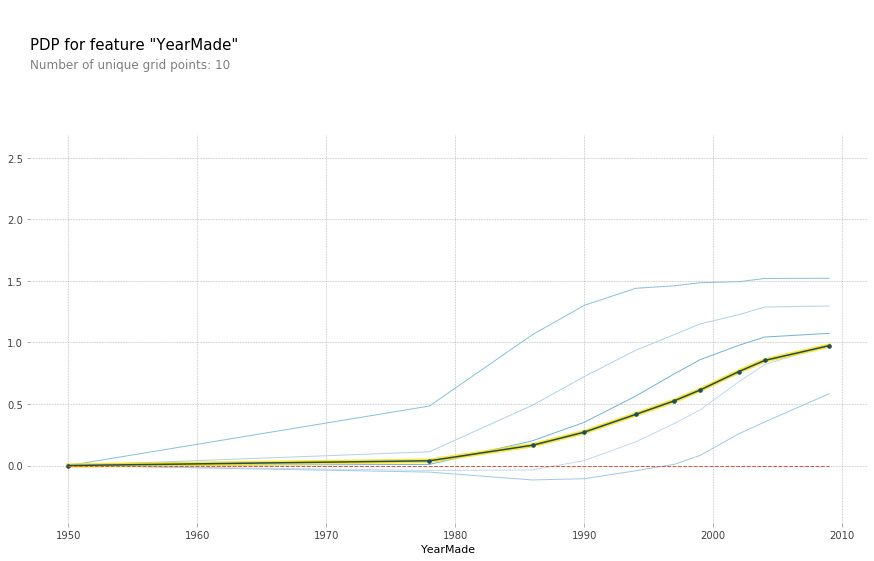

In [28]:
plot_pdp("YearMade", clusters=5)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f033d3803d0>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f033d37ced0>})

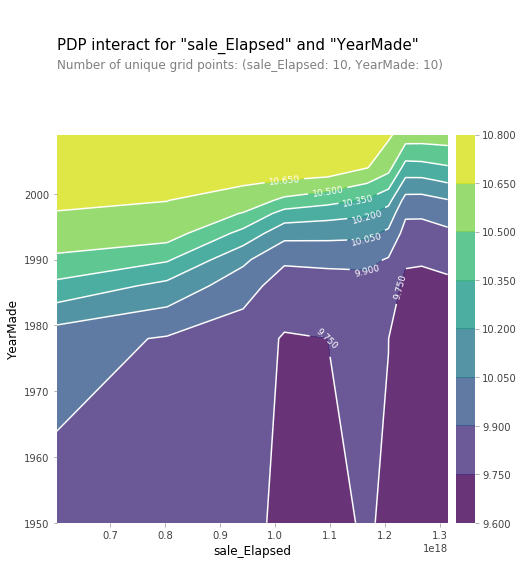

In [29]:
feats = ['sale_Elapsed', 'YearMade']
p = pdp.pdp_interact(m, x, x.columns, feats)
pdp.pdp_interact_plot(p, feats)

In [30]:
## there is interaction clearly between year made and sale elapsed

In [31]:
x_train.columns

Index(['YearMade', 'ProductSize', 'Enclosure', 'sale_Elapsed',
       'fiSecondaryDesc', 'fiProductClassDesc', 'ModelID', 'Hydraulics_Flow',
       'SalesID', 'fiBaseModel', 'MachineID', 'sale_Day', 'state',
       'sale_Dayofyear', 'ProductGroupDesc', 'fiModelDescriptor', 'Scarifier'],
      dtype='object')

In [22]:
col_to_keep = np.load("../output_files/tmp/col_to_keep.npy", allow_pickle= True)
col_to_keep = col_to_keep.tolist()
col_to_keep.append("sale_Year")

data = pd.read_feather('../output_files/tmp/bluebook_raw')
data, y, na_dict = proc_df(data, y_fld, na_dict)
data = data[col_to_keep]
data = data[col_to_keep]
data.YearMade[data.YearMade<1950] = 1950

data["Age"] = data["sale_Year"] - data["YearMade"]
data.drop("sale_Year", axis = 1, inplace= True)


/home/kiran/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [25]:
x_train, x_val = splitter(data, n_train)
y_train, y_val = splitter(y, n_train)

In [26]:
m = RandomForestRegressor(n_estimators= 100, bootstrap= True, n_jobs= -1, oob_score= True, max_features=.6,
                          min_samples_leaf= 3)
m.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
print_score(m)

[0.12331292276753517, 0.24034965286560947, 0.9682961099489198, 0.8894819521247184, 0.910183988526948]


In [28]:
test_data = pd.read_feather('../output_files/tmp/bluebook_raw_test')
x_test, y_test, na_dict = proc_df(test_data,y_fld, na_dict)

x_test = x_test[col_to_keep]
x_test.YearMade[x_test.YearMade<1950] = 1950

x_test["Age"] = x_test["sale_Year"] - x_test["YearMade"]
x_test.drop("sale_Year", axis = 1, inplace= True)

In [29]:
print(rmse(m.predict(x_test), y_test))

0.2582334064495604


In [81]:
## Using age is making results worse. Hence we will not use it

In [93]:
x_train.drop("Age", axis = 1, inplace= True)
x_test.drop("Age", axis = 1, inplace= True)
x_val.drop("Age", axis = 1, inplace= True)

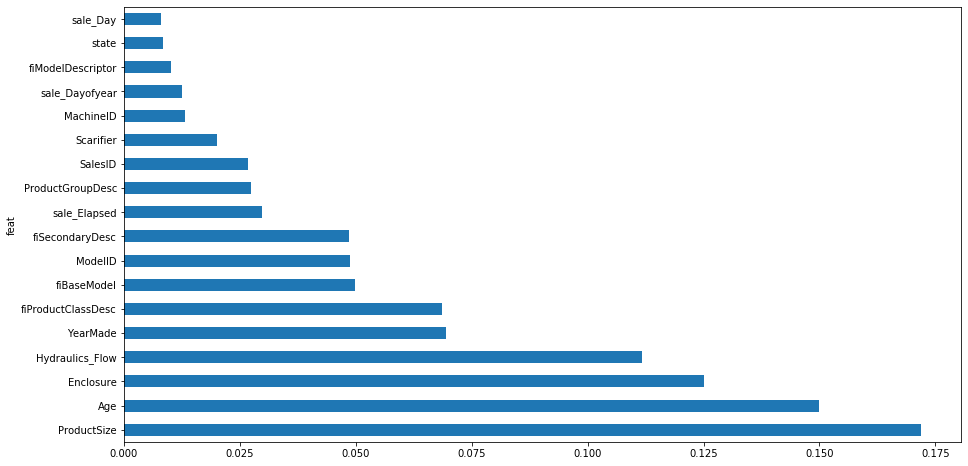

In [79]:
fi = rf_feat_imp(m,x_train)
plot_fi(fi)

In [ ]:
## Age however seems to be an important variable

In [94]:
m = RandomForestRegressor(n_estimators= 100, bootstrap= True, n_jobs= -1, oob_score= True, max_features=.6,
                          min_samples_leaf= 3)
m.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [101]:
print_score(m)

[0.12294492545925469, 0.23857563514276864, 0.96848505263819, 0.8911073958190623, 0.9102980540014073]


# Removing variables with only Extrapola

In [164]:
data.head()

,YearMade,ProductSize,Enclosure,sale_Elapsed,fiSecondaryDesc,fiProductClassDesc,ModelID,Hydraulics_Flow,SalesID,fiBaseModel,MachineID,sale_Day,state,sale_Dayofyear,ProductGroupDesc,fiModelDescriptor,Scarifier,Age
0,1974,4,3,600998400000000000,0,47,8434,0,1646770,1735,1126363,17,44,17,5,0,0,15
1,1986,0,4,602208000000000000,0,2,7110,0,1404019,243,1169900,31,9,31,1,0,0,3
2,1975,0,3,602208000000000000,57,31,3357,0,1415646,19,1262088,31,9,31,2,0,2,14
3,1978,4,3,602208000000000000,0,63,8247,0,1596358,349,1433229,31,9,31,6,0,0,11
4,1980,0,3,602208000000000000,0,60,10150,0,1821514,557,1194089,31,9,31,6,0,0,9


In [171]:
df_ext = data.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_train] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9999700841383609

In [174]:
fi = rf_feat_imp(m, x); fi[:10]

,feat,imp
3,sale_Elapsed,0.777634
8,SalesID,0.137333
10,MachineID,0.040108
13,sale_Dayofyear,0.038100
17,Age,0.002833
11,sale_Day,0.002370
2,Enclosure,0.000569
0,YearMade,0.000546
12,state,0.000206
5,fiProductClassDesc,0.000201


In [114]:
# 'sale_Elapsed', "SalesId" , "MachineID" seems able to detect which data is validation data

In [179]:
feats=['SalesID', 'sale_Elapsed', 'MachineID', 'Age', 'sale_Dayofyear']

In [175]:
x_train, x_val = splitter(data, n_train)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True, max_samples= 50000)
m.fit(x_train, y_train)
print_score(m)

[0.210282170127927, 0.25955569725773936, 0.9078065067765769, 0.8711135271045131, 0.8908549084969467]


In [183]:
for f in feats:
    df_subs = data.drop(f, axis=1)
    x_train, x_val = splitter(df_subs, n_train)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True, max_samples= 50000)
    m.fit(x_train, y_train)
    print(f)
    print_score(m)

SalesID
[0.2114239228562845, 0.25959530518758467, 0.9068026371734447, 0.8710741882193827, 0.8904655384356788]
sale_Elapsed
[0.21681815012646596, 0.26840679228712966, 0.9019863326000526, 0.8621733467858087, 0.8846499793928313]
MachineID
[0.20934297508412622, 0.25640067181714576, 0.9086282056031318, 0.874227838609414, 0.8927182183784501]
Age
[0.21224814046939047, 0.25633672171324123, 0.9060745773116622, 0.8742905696443455, 0.8892266827865178]
sale_Dayofyear
[0.2108600262451456, 0.25329618832661965, 0.9072991145107507, 0.8772550832544164, 0.8910498946327252]


In [30]:
col_to_drop = ["SalesID", "MachineID", "Age","sale_Dayofyear"]

In [31]:
df_subs = data.drop(col_to_drop, axis=1)
x_train, x_val = splitter(df_subs, n_train)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True, max_samples= 50000)
m.fit(x_train, y_train)
print_score(m)

[0.21077398402762063, 0.2449687641338188, 0.907374752957156, 0.8851931954886146, 0.8932360405544425]


In [33]:
m = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x_train, y_train)
print_score(m)

[0.13952438128795142, 0.23173833893938053, 0.9594121935403375, 0.8972594263805463, 0.9118205155586074]


In [34]:
m = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(x_train, y_train)
print_score(m)

[0.13674907990604857, 0.23307557601712459, 0.9610108115107886, 0.8960702843285606, 0.9120051318207198]


In [35]:
m = RandomForestRegressor(n_estimators=300, min_samples_leaf=3, max_features=0.5, n_jobs=2, oob_score=True)
m.fit(x_train, y_train)
print_score(m)

[0.13897021008074162, 0.2312083528703054, 0.9597339713513282, 0.8977288248248178, 0.9129707628141739]


In [39]:
print(rmse(m.predict(x_test.drop(col_to_drop, axis =1)), y_test))

0.24802939434895827


In [40]:
!pip install xgboost

     |████████████████████████████████| 109.7 MB 7.3 kB/s eta 0:00:01


In [41]:
from xgboost import XGBRegressor

In [44]:
XGBRegressor??

In [176]:
m = XGBRegressor(learning_rate =0.15,
 n_estimators=100, max_depth = 10, n_jobs = 3,colsample_bytree = .5, min_child_weight = 3,
                num_parallel_tree=3, subsample = .8)

In [177]:
m.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=3, num_parallel_tree=3,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
             validate_parameters=False, verbosity=None)

In [156]:
print_score(m)

[0.18474661758123667, 0.22734931340328018, 0.9288379645208685, 0.9011142980656249]


In [178]:
print_score(m)

[0.19023314224520452, 0.22628243373600912, 0.9245485251610376, 0.9020402002014483]


In [119]:
XGBRegressor??

In [62]:
print_score(m)

[0.20956099024064673, 0.23858947823898166, 0.9084377926324925, 0.8910947586985231]


In [68]:
print_score(m)

[0.20509990896842417, 0.23375900117048806, 0.9122946057056379, 0.8954599044882581]


In [179]:
print(rmse(m.predict(x_test.drop(col_to_drop, axis =1)), y_test))

0.2406035237962155


In [157]:
print(rmse(m.predict(x_test.drop(col_to_drop, axis =1)), y_test))

0.23932237789850994
